# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [125]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [126]:
import numpy as np

def coeff(x, m):
    
    A = np.zeros((len(x), m + 1)) 
    for i in range(len(x)):
        for j in range(m + 1):
            A[i][j] = x[i] ** j #design matrix
            
    coeff = np.linalg.solve ((A.T @ A), (A.T @ y)) #matrix equation A.T * A * b = A.T * y

    return coeff

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

<module 'matplotlib.pyplot' from '/Users/dmitry_nesterov/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

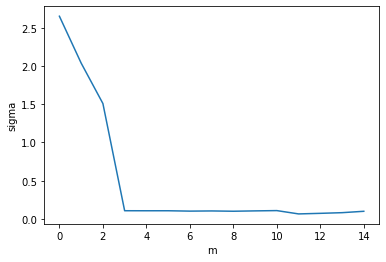

In [127]:
from numpy.polynomial.polynomial import polyval
import matplotlib.pyplot as plt

def sigma(x):
    
    n = len(x) + 1
    sigma = []
    
    for m in range(n - 1):
        sigma_m = 0
        for k in range(n - 1):
            sigma_m += (1 / (n - m)) * ((np.polyval(coeff(x, m)[::-1], x[k]) - y[k])**2)
        sigma.append(np.sqrt(sigma_m))
        
    return(sigma)

plt.plot([i for i in range(0, len(x))], sigma(x))
plt.xlabel('m')
plt.ylabel('sigma')
plt

As we can see here the optimal value of m when sigma starts increasing is 3

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

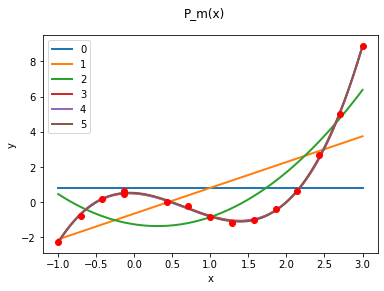

In [128]:
x = np.array(x)
x_p = np.linspace(-1, 3, 500)
fig, ax = plt.subplots()

m = 3
for m in range(6):
    y_p = np.polyval(coeff(x,m)[::-1], x_p)
    ax.plot(x_p, y_p, linewidth =2, label=m)
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.suptitle('P_m(x)')

ax.plot(x, y, 'o', c='red', label='Initial data')

As we can see, m = 3 is optimal as was determined above

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [129]:
def QR(x, y, m): #function which creates design matrix again and finds Q and R matrixes
    
    A = np.zeros((len(x), m + 1)) 
    for i in range(len(x)):
        for j in range(m + 1):
            A[i][j] = x[i] ** j 
            
    Q, R = np.linalg.qr(A)
    return Q, R

Q, R = QR(x, y, m = 3)
QR = np.linalg.solve(R, Q.T @ y)
np.testing.assert_allclose(coeff(x, 3), QR)

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

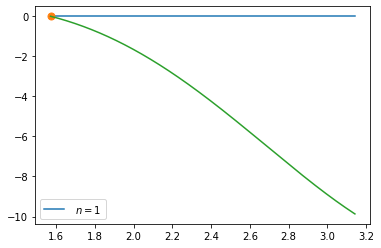

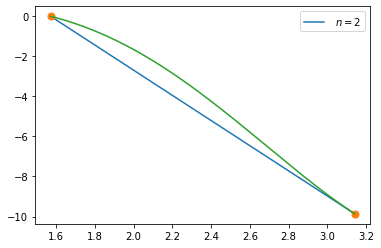

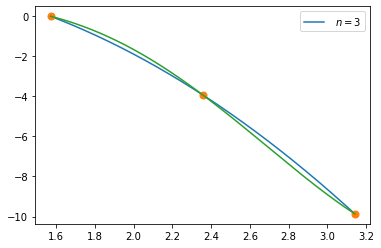

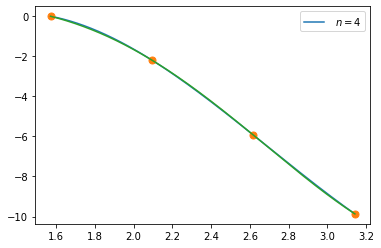

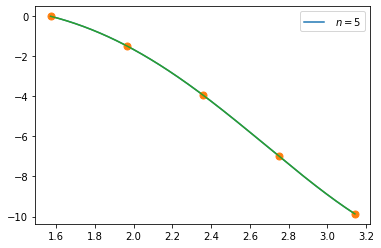

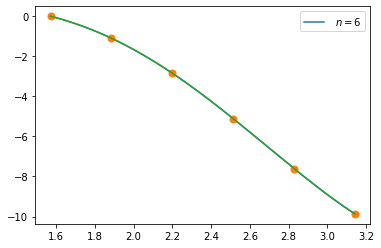

In [130]:
def f(x):
    return (x ** 2) * np.cos(x)

def l(value, x, k): #helping function
    a = 1 
    for j in range(len(x)):
        if j != k: 
            a *= (value - x[j]) / (x[k] - x[j])
    return a 

def lagrange(value, x, y):
    return sum(y[k] * l(value, x, k) for k in range(len(x)))

def plot(x, f):
    xn = np.linspace(np.pi / 2, np.pi, 1000)
    yn = [lagrange(i, x, f(x)) for i in xn]
    
    plt.plot(xn, yn, '-', label=r' $n= %s$' % len(x))
    plt.plot(x, f(x), 'o', ms=7)
    plt.legend()
    
xy = np.linspace(np.pi/2, np.pi, 1000)    
for m in range(6):
    plot(np.linspace(np.pi/2, np.pi, m + 1), f)
    plt.plot(xy, f(xy))
    plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

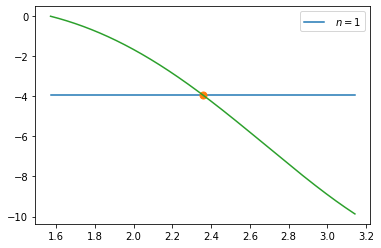

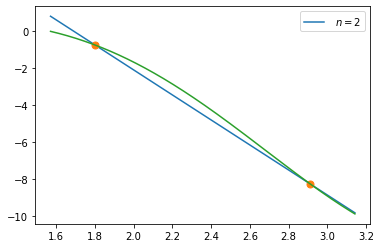

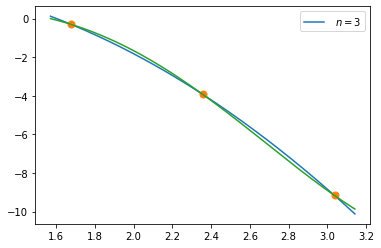

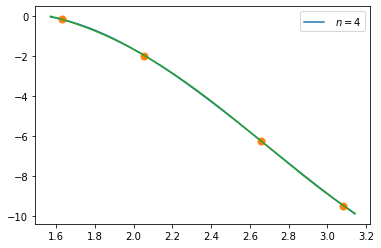

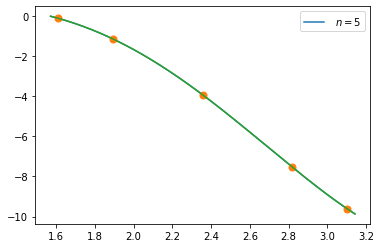

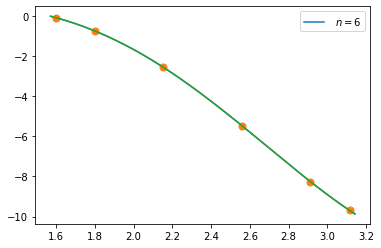

In [131]:
def chebyshev(k):
    return (np.pi/2+np.pi)/2 + (np.pi-np.pi/2)*np.cos((2*np.arange(1,k+1)-1)/2/k*np.pi)/2

for k in range(6):
    plot(chebyshev(k + 1), f)
    plt.plot(xy, f(xy))
    plt.show()

As we can notice, interpolation on a Chebyshev nodes is better